
**Завдання 1**: Завантажте дані `medical-charges.csv` в пандас датафрейм і виведіть перші 5 записів. Напишіть, як ви можете підійти до вирішення задачі прогнозування колонки `charges` на основі інших колонок виходячи з наявних на даний момент знань (без ML методів, чисто з використанням аналітики). Запишіть 3 або більше ідей, які приходять вам на думку нижче:

In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
%matplotlib inline

In [2]:
medical_df = pd.read_csv('C:/Users/dcmaterik_1/Documents/ML_for_people/Data/Lesson3_Linear_regresion/medical-charges.csv')

In [3]:
medical_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


**Спостереження**
Щоб спрогнозувати колонку charges можна використати EDA (аналіз даних в датафреймі) та на основі аналізу зробити гіпотези. Далі гіпотези можна протестувати на рівень значущості. Наприклад, за допомоною аналізу можна дослідити:
1. Які колонки найбільше впливають на цільову змінну charges (наприклад, колонка курці впливає сильно, а отже людям з ознакою курці можна пропонувати вищий charges)
2. Визначити, як впливає кажна колонка. Наприклад вік. Скоріш за все людям похилого віку потрібен вищий charges. Отже ми можемо визначити, що чим старше людина - тим більше значення charges. Наприклад можна розраховувати charges за допомогою формцли пропорції. Ми мижемо дізнатись, середній вік людини і середнє значення колонки charges. А далі, щоб визначити charges для певного віку - ми вік помножимо на середній charges і поділимо на середній вік.
3. Людям, що курять можна наначати високий charges. Наприклад в 1.3 рази вищий за медіану, коефіцієнт буде залежити від графіків та значень, які ми дослідимо.
4. На основі аналізу можна створити формулу визначення charges в залежності від того, як кожна колонка впливає на цільову змінну. Наприклад, можна визначити коефіцієнт кореляції для кожної колонки і множити його на дані з колонки, просумувати, та отримати charges. Наприклад, якщо коеф. кореляції колонки вік буде 0.6, sex - 0.1, bmi - o.3, children - 0.2, smoker - 0.7, region - 0.5, то формула буде виглядати так: 0.6*age+sex*0.1+bmi*0.3+children*0.2+smoker*0.7+region*0.5 = charges

**Завдання 2**: Візуалізуйте розподіл медичних зборів (`charges`) у вигляді інтерактивної гістограми plotly з розбиттями за категоріями ознак
1. `sex`
2. `region`

Додайте маржинальний графік у вигляді бокс-плота вгорі по дикретним категоріям ознак.
Скористайтесь прикладом візуалізації з лекції.
Опишіть свої спостереження.

In [23]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


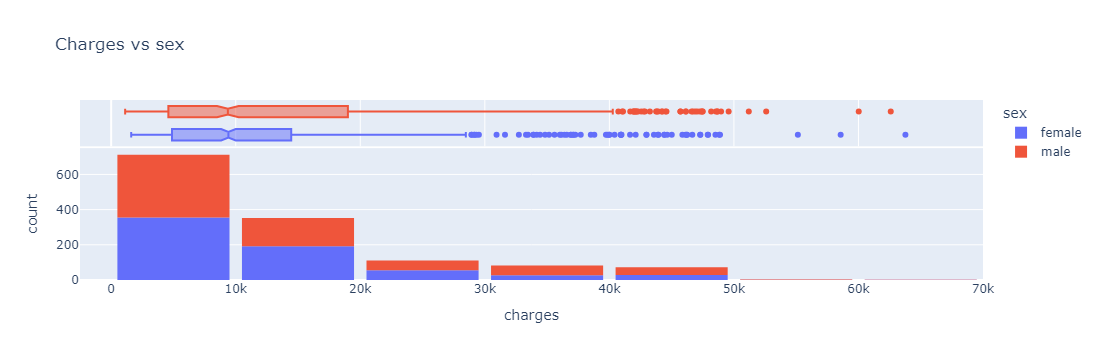

In [31]:
fig = px.histogram(medical_df,
                   x = 'charges',
                   marginal='box',
                   nbins=7,
                   color = 'sex',
                   title='Charges vs sex')
fig.update_layout(bargap=0.1)
fig.show()

**Спостереження**
Медіана у чоловіків та жінoк майже однакова (9369 у чоловіків та 9412 у жінок). В сегменті, де страхові збори до 20 тисяч жінок трішки більше ніж чоловіків, а от у страхових зборах більше 20 тисяч - чоловіків більше. У чоловікір більший розмах по сумі страхлвих зборів, ніж у жінок

In [27]:
medical_df.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

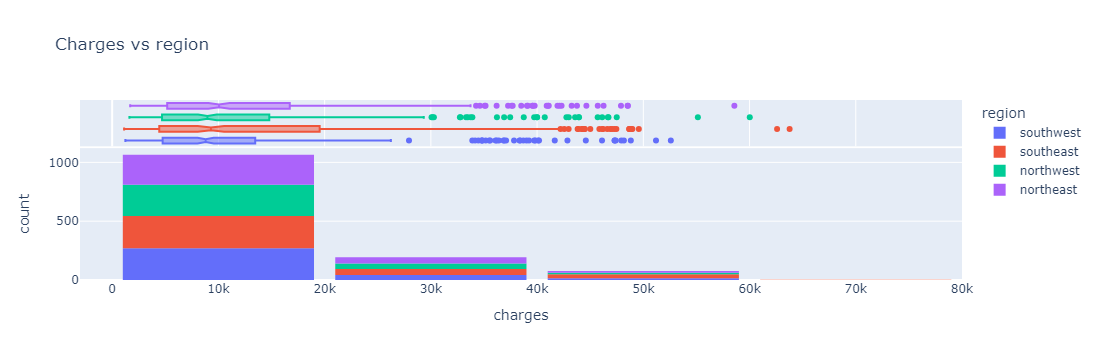

In [32]:
fig = px.histogram(medical_df,
                   x = 'charges',
                   marginal='box',
                   nbins=4,
                   color = 'region',
                   title='Charges vs region')
fig.update_layout(bargap=0.1)
fig.show()

**Спостереження**
Найбільша медіана у людей з northeast. Людей, що платять страхові збори більше 20 тисяч найбільше з регіону southeast, також в цьому регіоні найбільший розмах страховаих зборів.

**Завдання 3**: Візуалізуйте з `plotly` розподіл кожного з настуних стовпців відносно того, чи є людина курцем (`smoker`)
- `region`
- `children`

та опишіть коротко свої спостереження.

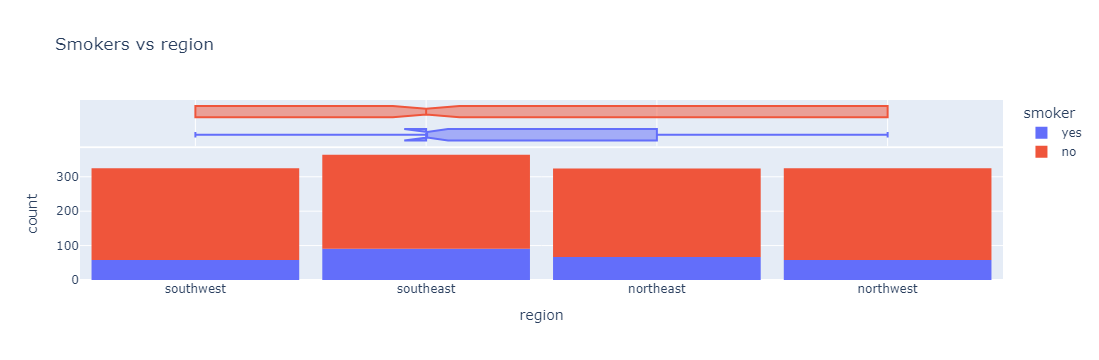

In [42]:
fig = px.histogram(medical_df,
                   x = 'region',
                   marginal='box',
                   nbins=4,
                   color = 'smoker',
                   title='Smokers vs region')
fig.update_layout(bargap=0.1)
fig.show()

**Спостереження**
Найбільше курців в регіоні southeast. На другому місці - northeast, і всі інші на третьому місці.

In [39]:
medical_df.children.unique()

array([0, 1, 3, 2, 5, 4], dtype=int64)

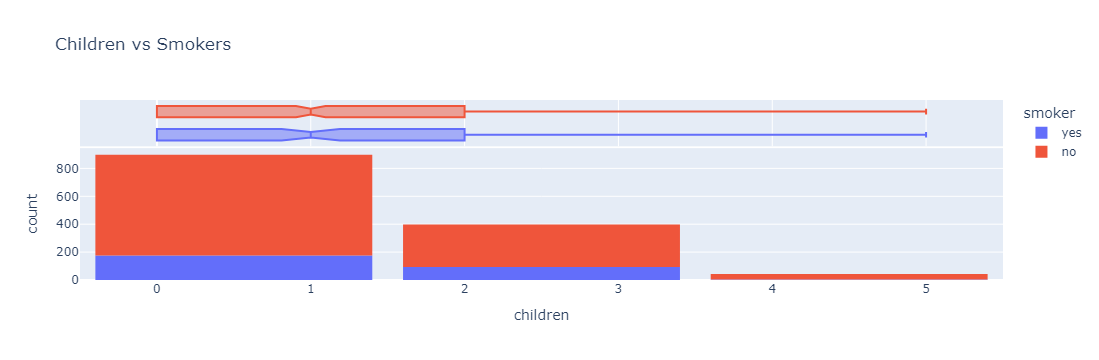

In [43]:
fig = px.histogram(medical_df,
                   x = 'children',
                   marginal='box',
                   nbins=5,
                   color = 'smoker',
                   title='Children vs Smokers')
fig.update_layout(bargap=0.1)
fig.show()

**Спостереження**
В середньому, люди незалежно від того є курцями чи ні мають 1 дитину. Курців, що мають більше 3 дітей значно менше, ніж людей, що не курять.

**Завдання 4**: Візуалізуйте звʼязок між стовпцем `charges` та `children` використовуючи графіки-скрипки (`px.violin`). Опишіть свої спостереження.

In [49]:
? px.violin

Signature:
 px.violin(
    data_frame=None,
    x=None,
    y=None,
    color=None,
    facet_row=None,
    facet_col=None,
    facet_col_wrap=0,
    facet_row_spacing=None,
    facet_col_spacing=None,
    hover_name=None,
    hover_data=None,
    custom_data=None,
    animation_frame=None,
    animation_group=None,
    category_orders=None,
    labels=None,
    color_discrete_sequence=None,
    color_discrete_map=None,
    orientation=None,
    violinmode=None,
    log_x=False,
    log_y=False,
    range_x=None,
    range_y=None,
    points=None,
    box=False,
    title=None,
    template=None,
    width=None,
    height=None,
) -> plotly.graph_objs._figure.Figure
Docstring:
    In a violin plot, rows of `data_frame` are grouped together into a
    curved mark to visualize their distribution.
    
Parameters
----------
data_frame: DataFrame or array-like or dict
    This argument needs to be passed for column names (and not keyword
    names) to be used. Array-like and dict are trans

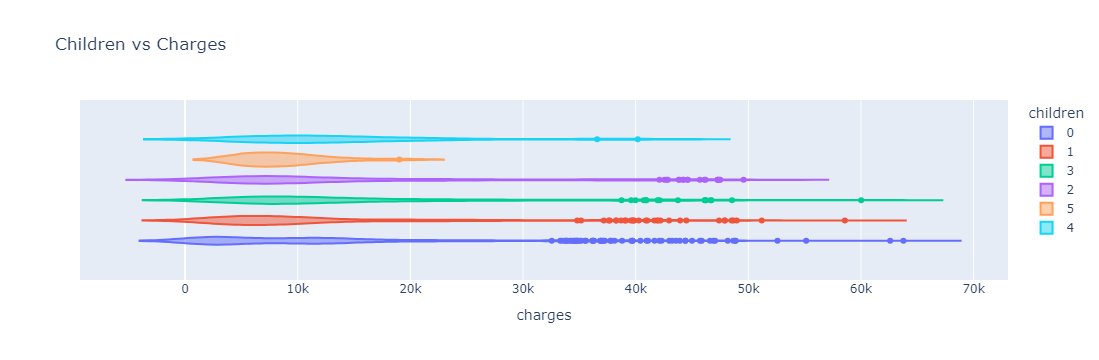

In [55]:
fig = px.violin(medical_df,
                   x = 'charges',
                   color = 'children',
                   title='Children vs Charges')
fig.update_layout(bargap=0.7)
fig.show()

**Спостереження**
Люди у яких 4 дітей, мають найбільшу медіану по стаховим зборам. Люди, у яких 2 дітей мають найбільший розмах страхових зборів. Люди, у яких 5 дітей мають найменший розмах страхових зборів.

**Завдання 5.** Розглянемо модель для користувачів, які не є курцями (`no_smoker_df`):

$$charges = w \times age + b$$

Спробуйте 3 різні пари параметрів `w` та `b` аби вручну підігнати лінію під дані використовуючи наведені допоміжні функції `estimate_charges` та `try_parameters`. Опишіть спостереження.
Пари параметрів мають бути НЕ такі, як були наведені в лекції.

In [56]:
non_smoker_df = medical_df[medical_df.smoker == 'no']

In [57]:
def estimate_charges(age, w, b):
    return w * age + b

In [58]:
def try_parameters(df, w, b):
    ages = df.age
    target = df.charges

    estimated_charges = estimate_charges(ages, w, b)

    plt.plot(ages, estimated_charges, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual']);

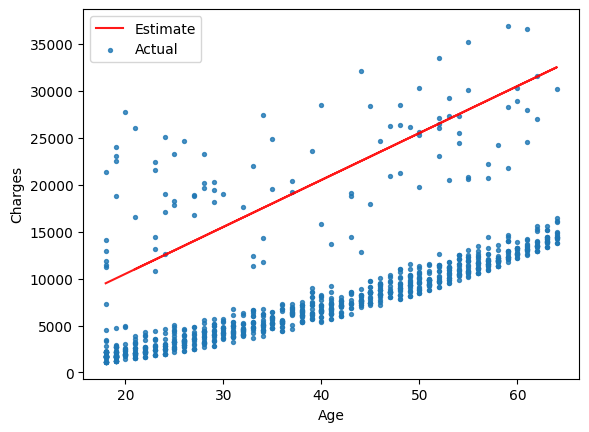

In [67]:
try_parameters(non_smoker_df, 500, 500)

**Спостереження**
Лінію слід опустити нижче, та зменшити кут нахилу, спробуємо зменшити параметри

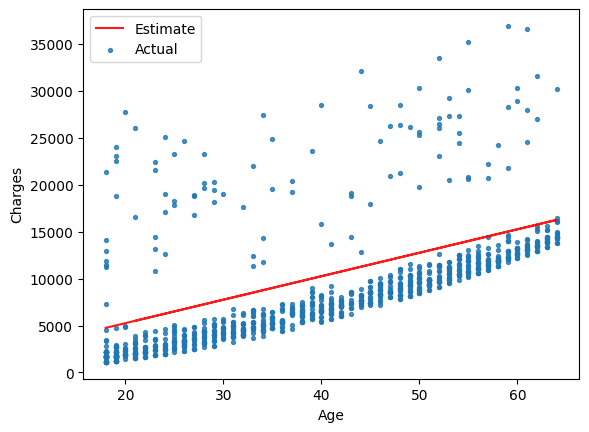

In [75]:
try_parameters(non_smoker_df, 250, 250)

**Спостереження**
Лінію слід опустити ще нижче

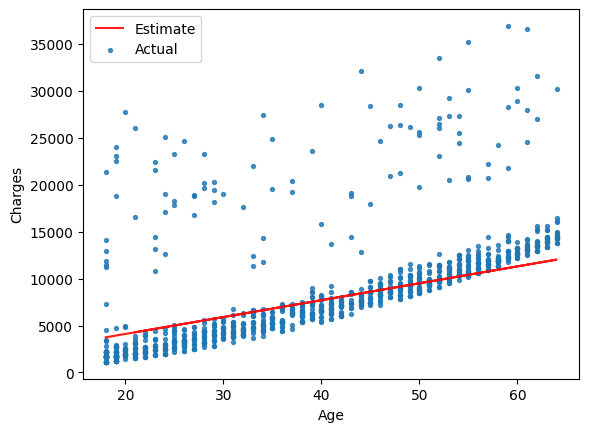

In [102]:
try_parameters(non_smoker_df, 180, 500)

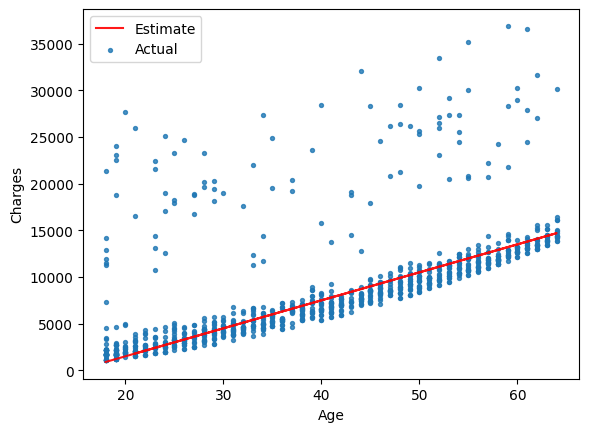

In [145]:
try_parameters(non_smoker_df, 300, -4500)

**Спостереження**
Ця лінія приблизно описує нижній кластер даних, але дані, які знаходяться вище цього скупчення зовсім не попадають на лінію. Можливо слід пудубрати лінію, яка буде знаходитись вище скупчення, щоб мінімізувати похибки.

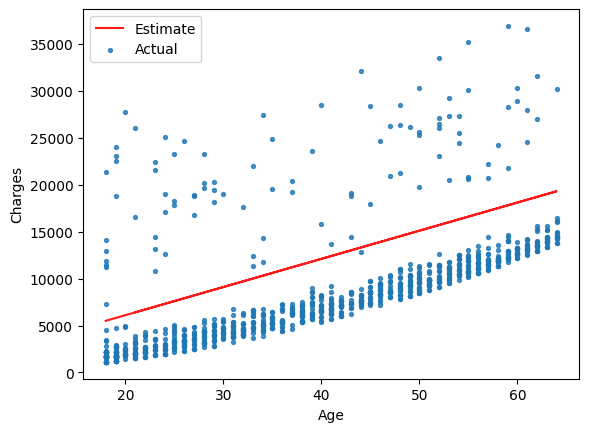

In [151]:
try_parameters(non_smoker_df, 300, 100)

**Спостереження**
Можливо тут похибки будуть менше, але я б зупинилась на лінії, яку я підібрала вище, з параметрами 300 і -4500. Адже в тій лінії наша модель частіше дає правильний результат, аніж помиляється.

**Завдання 6**: Напишіть фукнцію для обчислення root mean squared error згідно з формулою цієї метрики точності моделі з використанням `numpy`.

Обчисліть RMSE для тих пар пареметрів, які Ви спробували в завданні 5.

Яке найнижче значення втрат ви зможете досягти? Чи можете ви придумати загальну стратегію для знаходження кращих значень $w$ та $b$ методом проб та помилок?

In [177]:
def rmse(targets, predictions):
    n = len(targets)
    sum = 0
    for i in range(n):
        sum += np.square(predictions.iloc[i] - targets.iloc[i])
        
    return np.sqrt(sum/n)

In [181]:
targets = non_smoker_df['charges']
predicted = estimate_charges(non_smoker_df.age, 500, 500)

In [182]:
rmse(targets, predicted)

13066.509523547553

In [183]:
targets = non_smoker_df['charges']
predicted = estimate_charges(non_smoker_df.age, 250, 250)

In [184]:
rmse(targets, predicted)

4955.843090934381

In [185]:
targets = non_smoker_df['charges']
predicted = estimate_charges(non_smoker_df.age, 180, 500)

In [186]:
rmse(targets, predicted)

4895.024623925777

In [175]:
targets = non_smoker_df['charges']
predicted = estimate_charges(non_smoker_df.age, 300, -4500)

In [178]:
rmse(targets, predicted)

4816.941379466548

In [179]:
targets = non_smoker_df['charges']
predicted = estimate_charges(non_smoker_df.age, 300, 100)

In [180]:
rmse(targets, predicted)

5837.053173265297

**Спостереження**
Лінія з параметрами 300 і -4500 має найменшу похибку. Те саме спостереження я описала побудувавши візуальний графік. Найнижче значення втрат, яке я досягла - 4816.941379466548. Я думаю, що тут неможливо досягти 0 втрат, адже неможливо всі ці точки описати прямою. Але можна написати функцію для пошуку мінімальних втрат. Наприклад взяти за основу підібрані мною переметри та зробити певну кількість ітерацій(наприклад 1000) під час яких ми будемо змінювати кожен параметр на одиницю, та знаходити мінімальний RMSE.

